In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

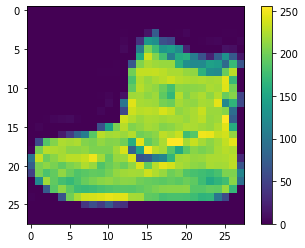

In [4]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.show()

Como los valores van de 0 a 255, hay que escalarlos a 0 y 1 antes de entrenarlos en la red neuronal.

In [5]:
train_images = train_images / 255.0

test_images = test_images / 255.0

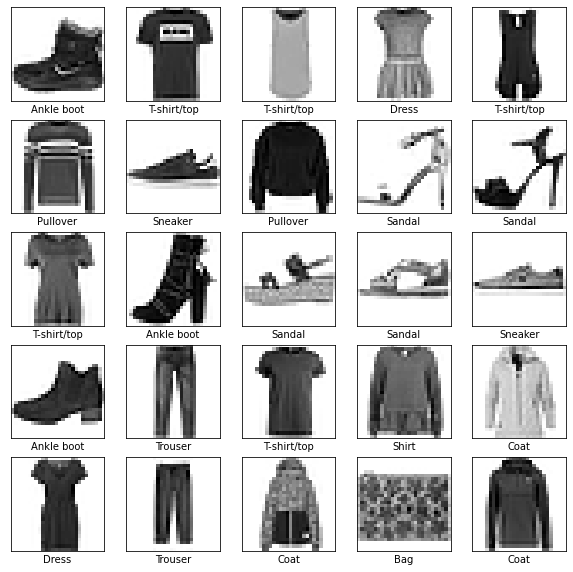

In [6]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [7]:
#Configuracion de capas
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), #La primera capa de esta red, tf.keras.layers.Flatten, transforma el formato de las imagenes de un arreglo bi-dimensional (de 28 por 28 pixeles) a un arreglo uni dimensional (de 28*28 pixeles = 784 pixeles). Observe esta capa como una capa no apilada de filas de pixeles en la misma imagen y alineandolo. Esta capa no tiene parametros que aprender; solo reformatea el set de datos.
    keras.layers.Dense(128, activation='relu'), #Despues de que los pixeles estan "aplanados", la secuencia consiste de dos capastf.keras.layers.Dense. Estas estan densamente conectadas, o completamente conectadas. La primera capa Dense tiene 128 nodos (o neuronas). La segunda (y ultima) capa es una capa de 10 nodos softmax que devuelve un arreglo de 10 probabilidades que suman a 1. Cada nodo contiene una calificacion que indica la probabilidad que la actual imagen pertenece a una de las 10 clases.
    keras.layers.Dense(10, activation='softmax')
])


Antes de que el modelo este listo para entrenar , se necesitan algunas configuraciones mas. Estas son agregadas durante el paso de compilacion del modelo:

Loss function —Esto mide que tan exacto es el modelo durante el entrenamiento. Quiere minimizar esta funcion para dirigir el modelo en la direccion adecuada.

Optimizer — Esto es como el modelo se actualiza basado en el set de datos que ve y la funcion de perdida.

Metrics — Se usan para monitorear los pasos de entrenamiento y de pruebas. El siguiente ejemplo usa accuracy (exactitud) , la fraccion de la imagenes que son correctamente clasificadas.

In [8]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6350 - accuracy: 0.7792
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3791 - accuracy: 0.8658
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3384 - accuracy: 0.8775
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3110 - accuracy: 0.8846
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2954 - accuracy: 0.8922
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2837 - accuracy: 0.8953
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2709 - accuracy: 0.8991
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2539 - accuracy: 0.9065
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2486 - accuracy: 0.9082
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.235

In [10]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

test_acc

313/313 - 0s - loss: 0.3364 - accuracy: 0.8820


0.8820000290870667

Resulta que la exactitud sobre el set de datos es un poco menor que la exactitud sobre el set de entrenamiento. Esta diferencia entre el entrenamiento y el test se debe a overfitting (sobre ajuste). Sobre ajuste sucede cuando un modelo de aprendizaje de maquina (ML) tiene un rendimiento peor sobre un set de datos nuevo, que nunca antes ha visto comparado con el de entrenamiento.

In [11]:
predictions = model.predict(test_images)

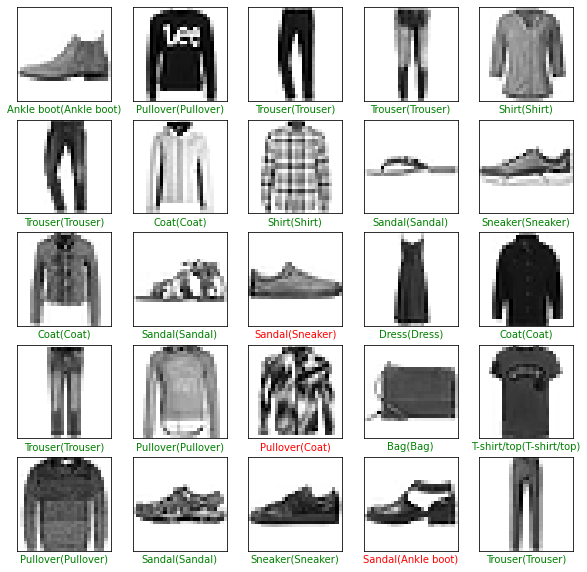

In [12]:
plt.figure(figsize=(10, 10))
for i in range(25):
  plt.subplot(5, 5, i + 1)
  plt.xticks([])
  plt.yticks([])

  plt.grid(False)

  plt.imshow(test_images[i], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions[i])
  true_label = test_labels[i]
  
  if predicted_label == true_label:
    color = 'green'
  else:
    color = 'red' 

  etiqueta = class_names[predicted_label] + '(' + class_names[true_label] + ')'
  plt.xlabel(etiqueta).set_color(color)